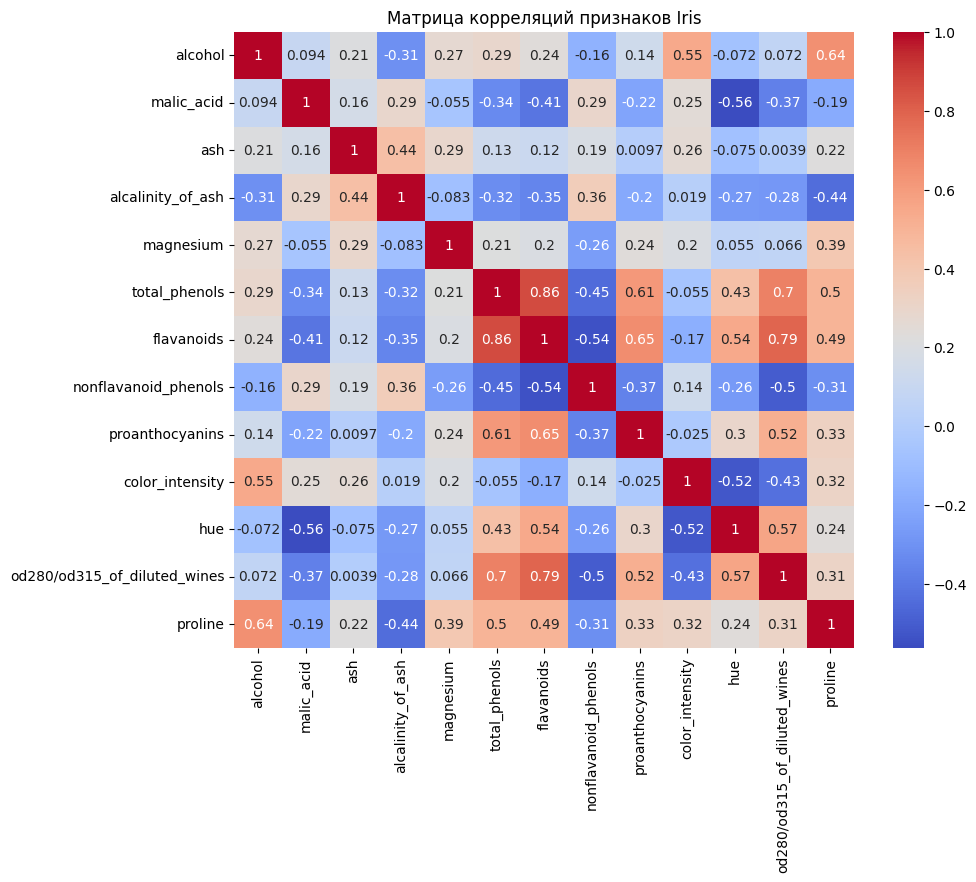

Исходные признаки:
Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

Отфильтрованные признаки:
Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols'],
      dtype='object')


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# Загрузка набора данных Wine
wine = load_wine()
data = wine.data
feature_names = wine.feature_names

# Создание DataFrame из массива данных
df = pd.DataFrame(data, columns=feature_names)

correlation_matrix = df.corr()

# Визуализация с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляций признаков Iris')
plt.show()

# Рассчет корреляционной матрицы
correlation_matrix = df.corr().abs()

# Установка порога корреляции
threshold = 0.5

# Поиск признаков с корреляцией выше порога
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] > threshold:
            correlated_feature = correlation_matrix.columns[i]
            correlated_features.add(correlated_feature)

# Исключение признаков с корреляцией выше порога
df_filtered = df.drop(columns=correlated_features)

# Вывод информации о признаках после фильтрации
print("Исходные признаки:")
print(df.columns)
print("\nОтфильтрованные признаки:")
print(df_filtered.columns)